In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from scipy import stats 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

### Reading Data

In [2]:
df = pd.read_excel('temp-rainfall data.xlsx')
df

,Month,2012temp X,2012rainfallY,2013temp X,2013rainfallY,2014temp X,2014rainfallY,2015temp X,2015rainfallY,2016temp X,2016rainfallY,2017temp X,2017rainfallY,2018temp X,2018rainfallY,2019temp X,2019rainfallY,2020temp X,2020rainfallY
0,Jan,17.35,0.97,17.52,4.53,17.35,2.53,17.68,0.66,17.81,6.18,17.23,0.77,18.10,1.94,17.94,2.07,15.68,3.87
1,Feb,17.93,6.01,18.32,3.81,18.29,10.58,18.54,1.84,18.62,2.89,18.18,1.45,18.96,3.03,19.40,1.50,16.10,2.58
2,March,18.68,3.11,18.84,13.77,18.55,6.73,18.52,5.05,20.10,3.07,19.39,1.51,18.00,8.02,20.32,2.98,16.90,3.98
3,April,17.63,25.78,17.87,28.06,17.83,8.59,18.00,7.89,18.33,10.91,18.33,6.58,17.73,12.98,19.50,6.07,15.40,7.72
4,May,16.70,16.74,16.97,8.60,17.45,7.90,17.65,7.63,16.90,8.60,17.45,5.56,17.29,9.09,17.81,6.55,14.94,5.25
5,June,16.23,9.80,15.93,11.59,17.00,6.89,17.17,2.56,16.50,4.85,17.33,2.03,16.40,7.45,16.70,7.37,14.43,5.08
6,July,15.71,10.11,15.77,11.37,16.45,4.53,16.97,1.71,16.06,1.94,17.00,2.28,16.10,2.79,16.26,3.52,13.87,4.97
7,Aug,16.58,7.30,16.23,5.47,16.68,6.33,17.35,2.69,16.81,3.10,17.26,3.21,17.23,1.31,17.03,3.94,14.74,5.84
8,Sep,17.73,6.34,17.73,7.16,17.33,5.56,18.33,1.83,17.73,1.96,18.23,2.12,18.23,3.71,17.67,4.12,15.67,4.90
9,Oct,17.73,6.34,17.94,8.82,17.87,9.07,18.97,2.52,18.23,4.49,18.55,8.86,18.16,6.62,17.55,8.80,15.55,8.15


In [3]:
df.head()

,Month,2012temp X,2012rainfallY,2013temp X,2013rainfallY,2014temp X,2014rainfallY,2015temp X,2015rainfallY,2016temp X,2016rainfallY,2017temp X,2017rainfallY,2018temp X,2018rainfallY,2019temp X,2019rainfallY,2020temp X,2020rainfallY
0,Jan,17.35,0.97,17.52,4.53,17.35,2.53,17.68,0.66,17.81,6.18,17.23,0.77,18.10,1.94,17.94,2.07,15.68,3.87
1,Feb,17.93,6.01,18.32,3.81,18.29,10.58,18.54,1.84,18.62,2.89,18.18,1.45,18.96,3.03,19.40,1.50,16.10,2.58
2,March,18.68,3.11,18.84,13.77,18.55,6.73,18.52,5.05,20.10,3.07,19.39,1.51,18.00,8.02,20.32,2.98,16.90,3.98
3,April,17.63,25.78,17.87,28.06,17.83,8.59,18.00,7.89,18.33,10.91,18.33,6.58,17.73,12.98,19.50,6.07,15.40,7.72
4,May,16.70,16.74,16.97,8.60,17.45,7.90,17.65,7.63,16.90,8.60,17.45,5.56,17.29,9.09,17.81,6.55,14.94,5.25


In [4]:
df.tail()

,Month,2012temp X,2012rainfallY,2013temp X,2013rainfallY,2014temp X,2014rainfallY,2015temp X,2015rainfallY,2016temp X,2016rainfallY,2017temp X,2017rainfallY,2018temp X,2018rainfallY,2019temp X,2019rainfallY,2020temp X,2020rainfallY
7,Aug,16.58,7.30,16.23,5.47,16.68,6.33,17.35,2.69,16.81,3.10,17.26,3.21,17.23,1.31,17.03,3.94,14.74,5.84
8,Sep,17.73,6.34,17.73,7.16,17.33,5.56,18.33,1.83,17.73,1.96,18.23,2.12,18.23,3.71,17.67,4.12,15.67,4.90
9,Oct,17.73,6.34,17.94,8.82,17.87,9.07,18.97,2.52,18.23,4.49,18.55,8.86,18.16,6.62,17.55,8.80,15.55,8.15
10,Nov,16.70,17.04,16.83,14.71,16.93,9.76,17.27,9.22,16.87,4.23,17.43,2.42,17.60,4.94,16.20,10.37,14.97,5.57
11,Dec,16.45,9.53,16.39,8.24,16.39,2.09,17.19,3.15,16.61,1.33,17.39,1.43,17.58,1.46,16.71,5.31,15.03,1.71


In [5]:
df.shape

(12, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          12 non-null     object 
 1   2012temp X     12 non-null     float64
 2   2012rainfallY  12 non-null     float64
 3   2013temp X     12 non-null     float64
 4   2013rainfallY  12 non-null     float64
 5   2014temp X     12 non-null     float64
 6   2014rainfallY  12 non-null     float64
 7   2015temp X     12 non-null     float64
 8   2015rainfallY  12 non-null     float64
 9   2016temp X     12 non-null     float64
 10  2016rainfallY  12 non-null     float64
 11  2017temp X     12 non-null     float64
 12  2017rainfallY  12 non-null     float64
 13  2018temp X     12 non-null     float64
 14  2018rainfallY  12 non-null     float64
 15  2019temp X     12 non-null     float64
 16  2019rainfallY  12 non-null     float64
 17  2020temp X     12 non-null     float64
 18  2020rainfall

In [7]:
#summary statistics of the numerical columns in a dataframe
df.describe()

,2012temp X,2012rainfallY,2013temp X,2013rainfallY,2014temp X,2014rainfallY,2015temp X,2015rainfallY,2016temp X,2016rainfallY,2017temp X,2017rainfallY,2018temp X,2018rainfallY,2019temp X,2019rainfallY,2020temp X,2020rainfallY
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,17.118333,9.922500,17.195000,10.510833,17.343333,6.713333,17.803333,3.895833,17.54750,4.462500,17.814167,3.185000,17.615000,5.278333,17.757500,5.216667,15.273333,4.968333
std,0.853888,6.896724,0.989403,6.516466,0.695026,2.694578,0.656012,2.844556,1.14641,2.869118,0.713716,2.485842,0.792447,3.607696,1.341655,2.713228,0.796131,1.844327
min,15.710000,0.970000,15.770000,3.810000,16.390000,2.090000,16.970000,0.660000,16.06000,1.330000,17.000000,0.770000,16.100000,1.310000,16.200000,1.500000,13.870000,1.710000
25%,16.547500,6.257500,16.350000,6.737500,16.867500,5.302500,17.250000,1.837500,16.76000,2.657500,17.312500,1.495000,17.275000,2.577500,16.707500,3.385000,14.890000,3.952500
50%,17.025000,8.415000,17.245000,8.710000,17.340000,6.810000,17.665000,2.625000,17.31500,3.665000,17.440000,2.200000,17.665000,4.325000,17.610000,4.715000,15.215000,5.025000
75%,17.730000,11.767500,17.887500,12.135000,17.840000,8.710000,18.377500,5.695000,18.25500,5.182500,18.255000,3.797500,18.115000,7.592500,18.305000,6.755000,15.672500,5.637500
max,18.680000,25.780000,18.840000,28.060000,18.550000,10.580000,18.970000,9.220000,20.10000,10.910000,19.390000,8.860000,18.960000,12.980000,20.320000,10.370000,16.900000,8.150000


### Annual Rainfall And Temperature Trends

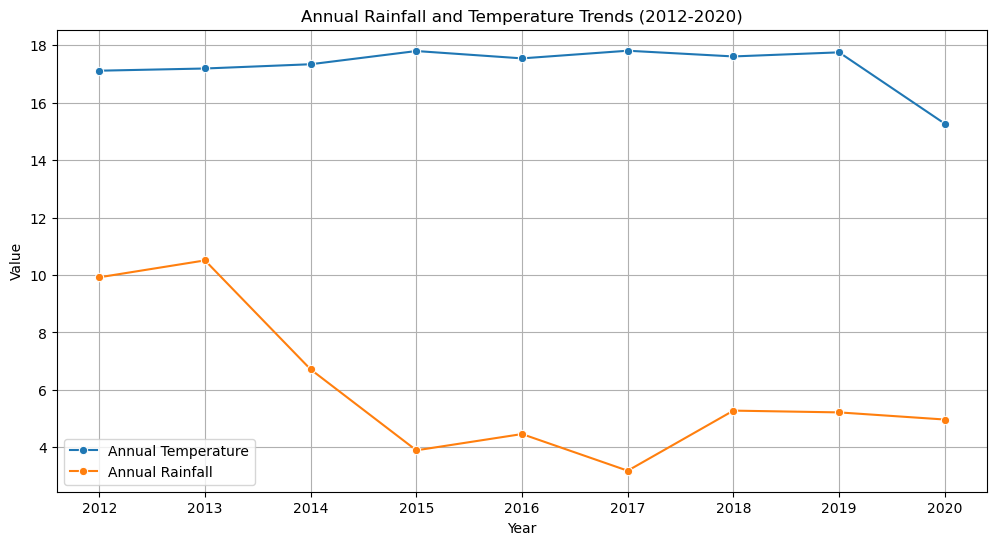

In [8]:
# Calculate annual averages for temperature and rainfall
years = range(2012, 2021)
annual_temp = df.filter(like='temp').mean(axis=0).values
annual_rainfall = df.filter(like='rainfall').mean(axis=0).values

# Plotting the annual trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=years, y=annual_temp, marker='o', label='Annual Temperature')
sns.lineplot(x=years, y=annual_rainfall, marker='o', label='Annual Rainfall')
plt.title('Annual Rainfall and Temperature Trends (2012-2020)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Variability index

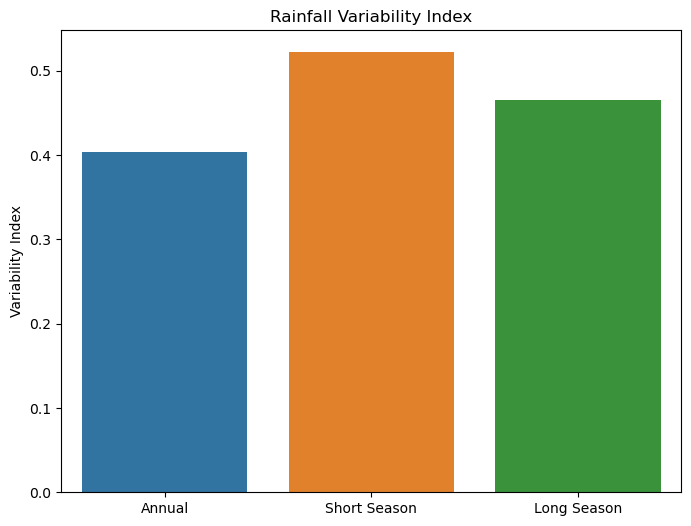

Annual Variability Index of Rainfall: 0.40
Short Season Variability Index of Rainfall: 0.52
Long Season Variability Index of Rainfall: 0.47


In [9]:
# Calculate annual and seasonal averages
years = range(2012, 2021)

# Annual averages
annual_rainfall = df.filter(like='rainfall').mean(axis=0).values

# Seasonal averages: Short season (Feb-Apr) and Long season (Jun-Sep)
short_season_rainfall = df.loc[1:3].filter(like='rainfall').mean(axis=0).values
long_season_rainfall = df.loc[5:8].filter(like='rainfall').mean(axis=0).values

# Calculate variability index
def variability_index(data):
    mean = np.mean(data)
    std = np.std(data)
    return std / mean

annual_variability_rainfall = variability_index(annual_rainfall)
short_season_variability_rainfall = variability_index(short_season_rainfall)
long_season_variability_rainfall = variability_index(long_season_rainfall)

# Visualize the variability indices
labels = ['Annual', 'Short Season', 'Long Season']
variability_indices = [annual_variability_rainfall, short_season_variability_rainfall, long_season_variability_rainfall]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=variability_indices)
plt.title('Rainfall Variability Index')
plt.ylabel('Variability Index')
plt.show()

# Print variability indices
print(f'Annual Variability Index of Rainfall: {annual_variability_rainfall:.2f}')
print(f'Short Season Variability Index of Rainfall: {short_season_variability_rainfall:.2f}')
print(f'Long Season Variability Index of Rainfall: {long_season_variability_rainfall:.2f}')

### Comparative trend analysis

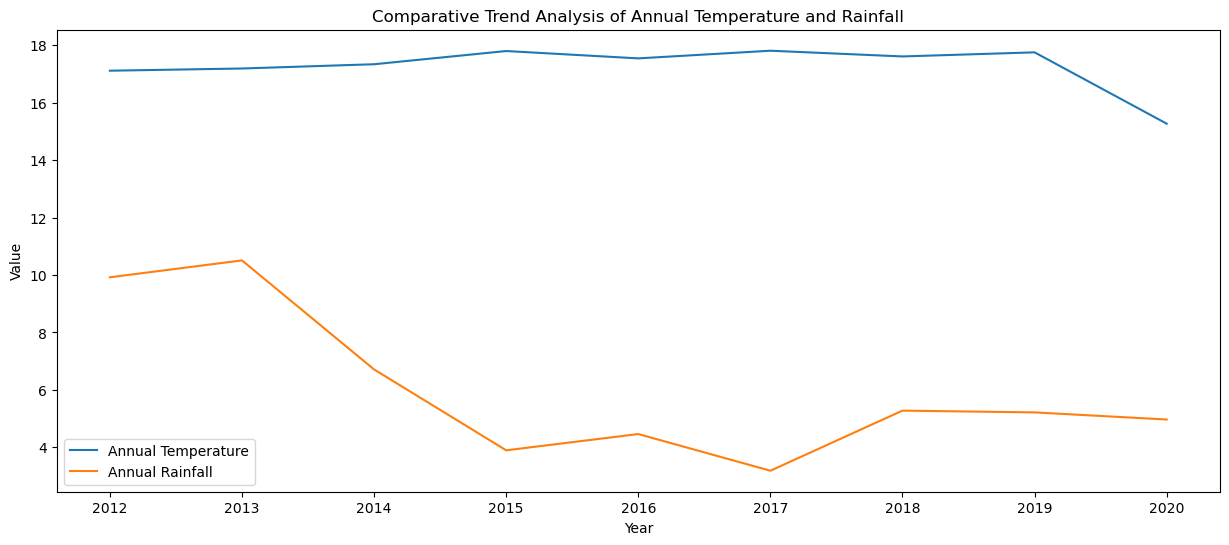

In [10]:
# Comparative trend analysis
plt.figure(figsize=(15, 6))
sns.lineplot(x=years, y=annual_temp, label='Annual Temperature')
sns.lineplot(x=years, y=annual_rainfall, label='Annual Rainfall')
plt.title('Comparative Trend Analysis of Annual Temperature and Rainfall')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### Graph of trend of temperature and rainfall for short and long seasons

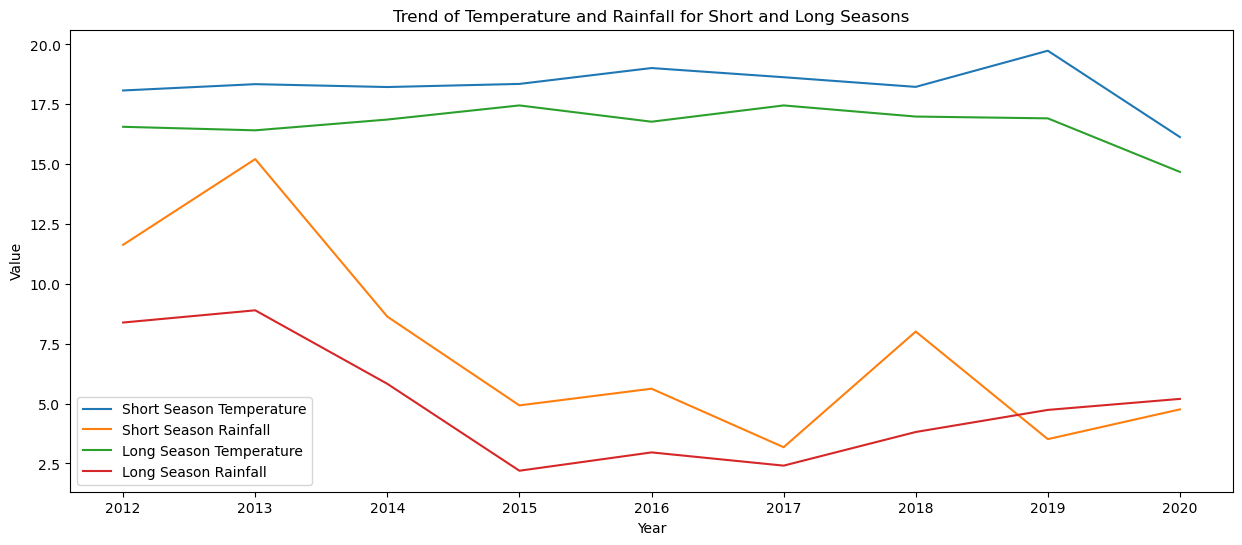

In [11]:
# Seasonal averages: Short season (Feb-Apr) and Long season (Jun-Sep)
short_season_temp = df.loc[1:3].filter(like='temp').mean(axis=0).values
short_season_rainfall = df.loc[1:3].filter(like='rainfall').mean(axis=0).values

long_season_temp = df.loc[5:8].filter(like='temp').mean(axis=0).values
long_season_rainfall = df.loc[5:8].filter(like='rainfall').mean(axis=0).values
# Graph of trend of temperature and rainfall for short and long seasons
plt.figure(figsize=(15, 6))
sns.lineplot(x=years, y=short_season_temp, label='Short Season Temperature')
sns.lineplot(x=years, y=short_season_rainfall, label='Short Season Rainfall')
sns.lineplot(x=years, y=long_season_temp, label='Long Season Temperature')
sns.lineplot(x=years, y=long_season_rainfall, label='Long Season Rainfall')
plt.title('Trend of Temperature and Rainfall for Short and Long Seasons')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### Correlation

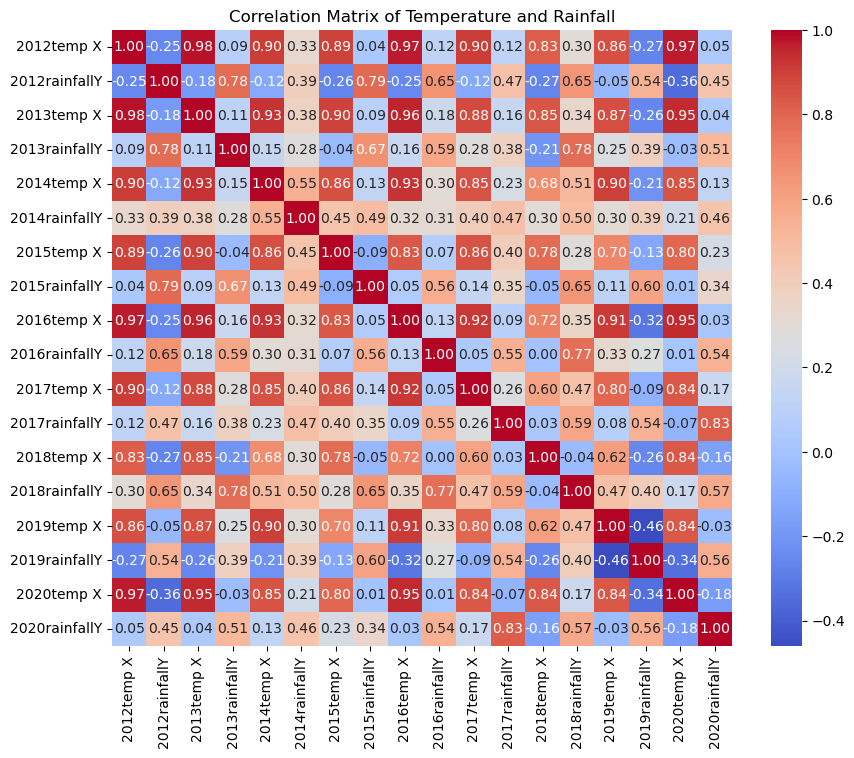

In [12]:
# Correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Temperature and Rainfall')
plt.show()

### Simple Linear Regression

In [13]:
# Selecting independent (X) and dependent (Y) variables
X = df['2020temp X'].values
Y = df['2020rainfallY'].values

In [14]:
# Simple linear regression model
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()

In [15]:
import warnings
# Summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.3265
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.580
Time:                        00:45:06   Log-Likelihood:                -23.658
No. Observations:                  12   AIC:                             51.32
Df Residuals:                      10   BIC:                             52.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2597     11.024      1.021      0.3

C:\Users\PC\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
# Confidence interval at 95%
predictions = model.get_prediction(X)
predictions_summary = predictions.summary_frame(alpha=0.05)
predictions_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.800819,0.622814,3.413104,6.188534,0.338255,9.263383
1,4.627813,0.810619,2.821642,6.433983,0.017935,9.237691
2,4.298277,1.295030,1.412769,7.183785,-0.831526,9.428080
3,4.916157,0.557035,3.675005,6.157308,0.496974,9.335340
4,5.105640,0.599745,3.769324,6.441956,0.658792,9.552488
5,5.315719,0.819492,3.489777,7.141661,0.698059,9.933380
6,5.546394,1.151270,2.981206,8.111583,0.589690,10.503098
7,5.188024,0.670653,3.693715,6.682333,0.691172,9.684876
8,4.804938,0.619453,3.424711,6.185165,0.344698,9.265179
9,4.854369,0.584577,3.551851,6.156887,0.417560,9.291178


In [17]:
from scipy.stats import f

# Calculate residuals
residuals = model.resid
# Degrees of freedom
df_model = model.df_model
df_resid = model.df_resid
# Mean Squared Error (MSE)
mse = model.mse_resid
# Calculate ANOVA
anova_table = {'df': [df_model, df_resid],
               'sum_sq': [model.ess, model.ssr + model.ess],
               'mean_sq': [model.ess / df_model, (model.ssr + model.ess) / df_resid],
               'F': [(model.ess / df_model) / mse, None],
               'PR(>F)': [f.sf((model.ess / df_model) / mse, df_model, df_resid), None]}

anova_df = pd.DataFrame(anova_table, index=['Model', 'Residual'])
anova_df

# R-squared
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

# Mean Squared Error (MSE)
print(f"Mean Squared Error (MSE): {mse}")

# Significance (P-value)
f_p_value = anova_df.loc['Model', 'PR(>F)']
print(f"Significance (P-value): {f_p_value}")

# Range of X and Y
range_X = np.ptp(X[:, 1])  # Peak-to-Peak (Max - Min)
range_Y = np.ptp(Y)

print(f"Range of Independent Variable (X): {range_X}")
print(f"Range of Dependent Variable (Y): {range_Y}")



R-squared: 0.031616850120937845
Mean Squared Error (MSE): 3.6233960039586544
Significance (P-value): 0.5803471511228596
Range of Independent Variable (X): 3.0299999999999994
Range of Dependent Variable (Y): 6.44


These results show that temperature is not a significant predictor of rainfall based on the provided data. The low R-squared value, high P-value, and non-significant coefficients indicate that the linear regression model does not fit the data well and the relationship between temperature and rainfall is weak.

### Regression Line

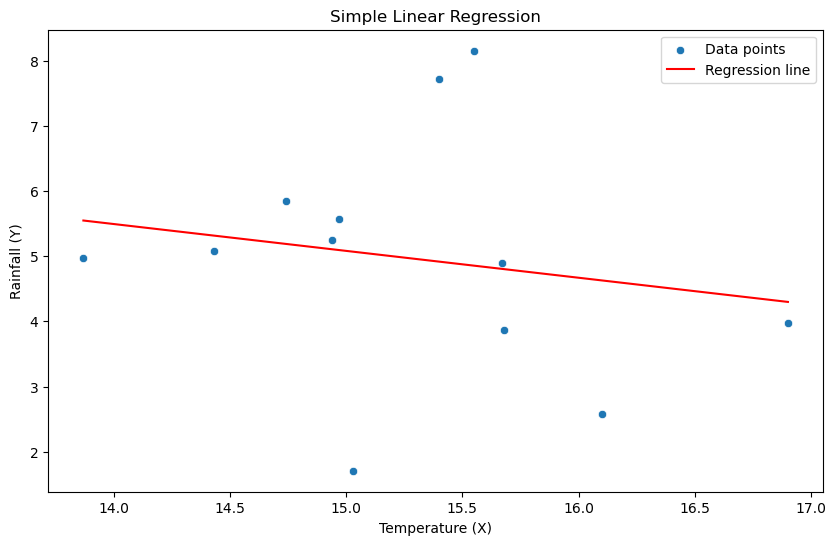

In [18]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['2020temp X'], y=df['2020rainfallY'], label='Data points')
sns.lineplot(x=df['2020temp X'], y=model.predict(X), color='red', label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('Temperature (X)')
plt.ylabel('Rainfall (Y)')
plt.legend()
plt.show()

## Checking for outliers

First few rows of the dataframe:
   Month  2012temp X  2012rainfallY  2013temp X  2013rainfallY  2014temp X  \
0    Jan       17.35           0.97       17.52           4.53       17.35   
1    Feb       17.93           6.01       18.32           3.81       18.29   
2  March       18.68           3.11       18.84          13.77       18.55   
3  April       17.63          25.78       17.87          28.06       17.83   
4    May       16.70          16.74       16.97           8.60       17.45   

   2014rainfallY  2015temp X  2015rainfallY  2016temp X  2016rainfallY  \
0           2.53       17.68           0.66       17.81           6.18   
1          10.58       18.54           1.84       18.62           2.89   
2           6.73       18.52           5.05       20.10           3.07   
3           8.59       18.00           7.89       18.33          10.91   
4           7.90       17.65           7.63       16.90           8.60   

   2017temp X  2017rainfallY  2018temp X  2018rainfal

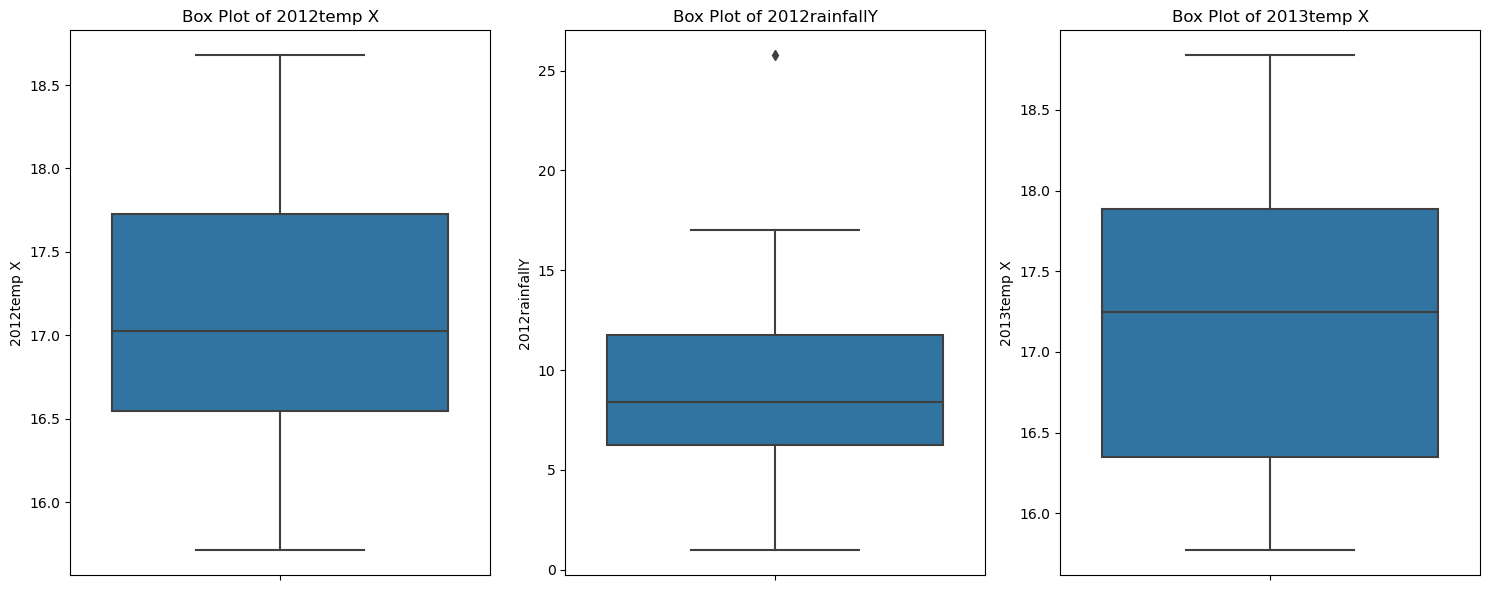

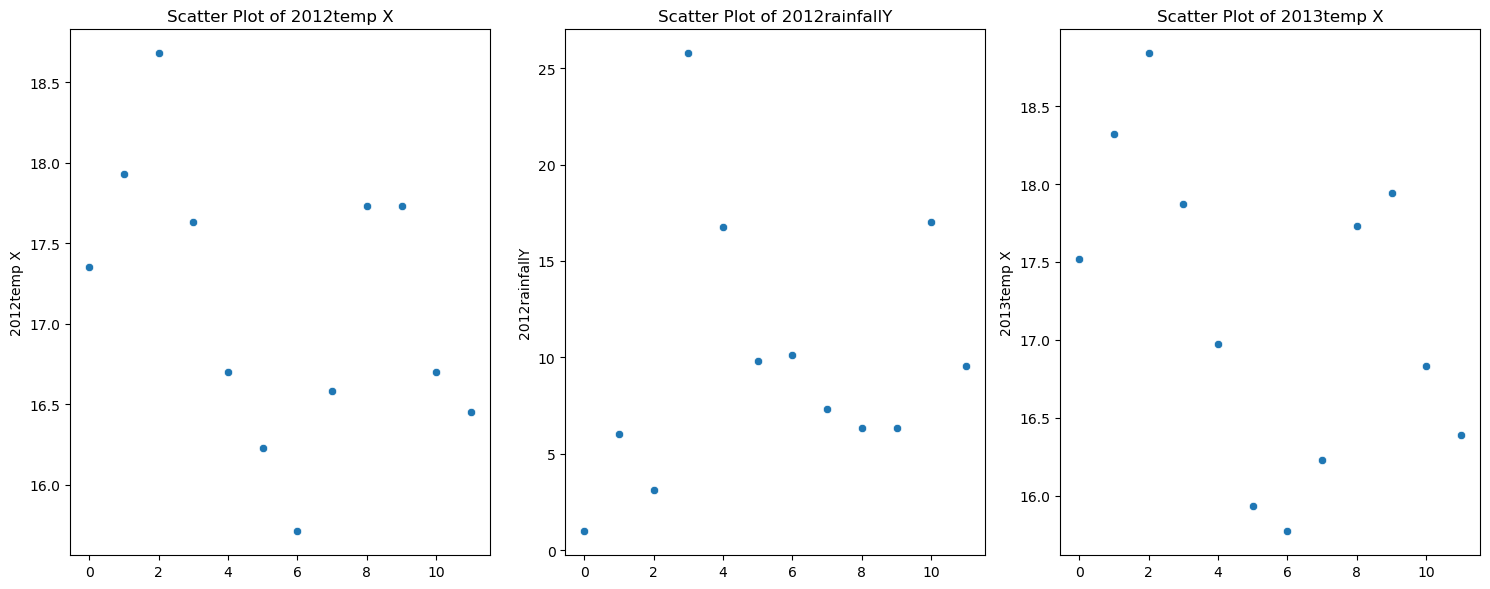


Outliers identified by Z-score method (threshold = 3):
(array([], dtype=int64), array([], dtype=int64))

Outliers identified by IQR method:
   2012temp X  2012rainfallY  2013temp X  2013rainfallY  2014temp X  \
2       18.68           3.11       18.84          13.77       18.55   
3       17.63          25.78       17.87          28.06       17.83   
9       17.73           6.34       17.94           8.82       17.87   

   2014rainfallY  2015temp X  2015rainfallY  2016temp X  2016rainfallY  \
2           6.73       18.52           5.05       20.10           3.07   
3           8.59       18.00           7.89       18.33          10.91   
9           9.07       18.97           2.52       18.23           4.49   

   2017temp X  2017rainfallY  2018temp X  2018rainfallY  2019temp X  \
2       19.39           1.51       18.00           8.02       20.32   
3       18.33           6.58       17.73          12.98       19.50   
9       18.55           8.86       18.16           6.62       17

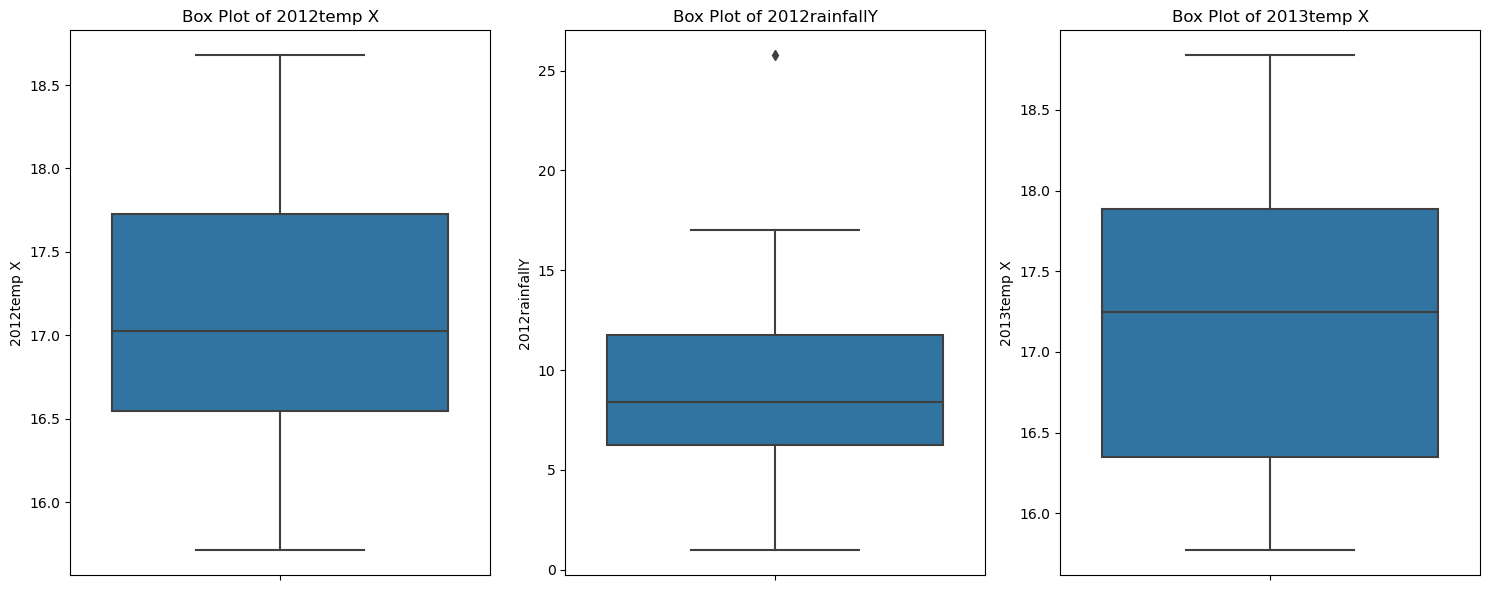

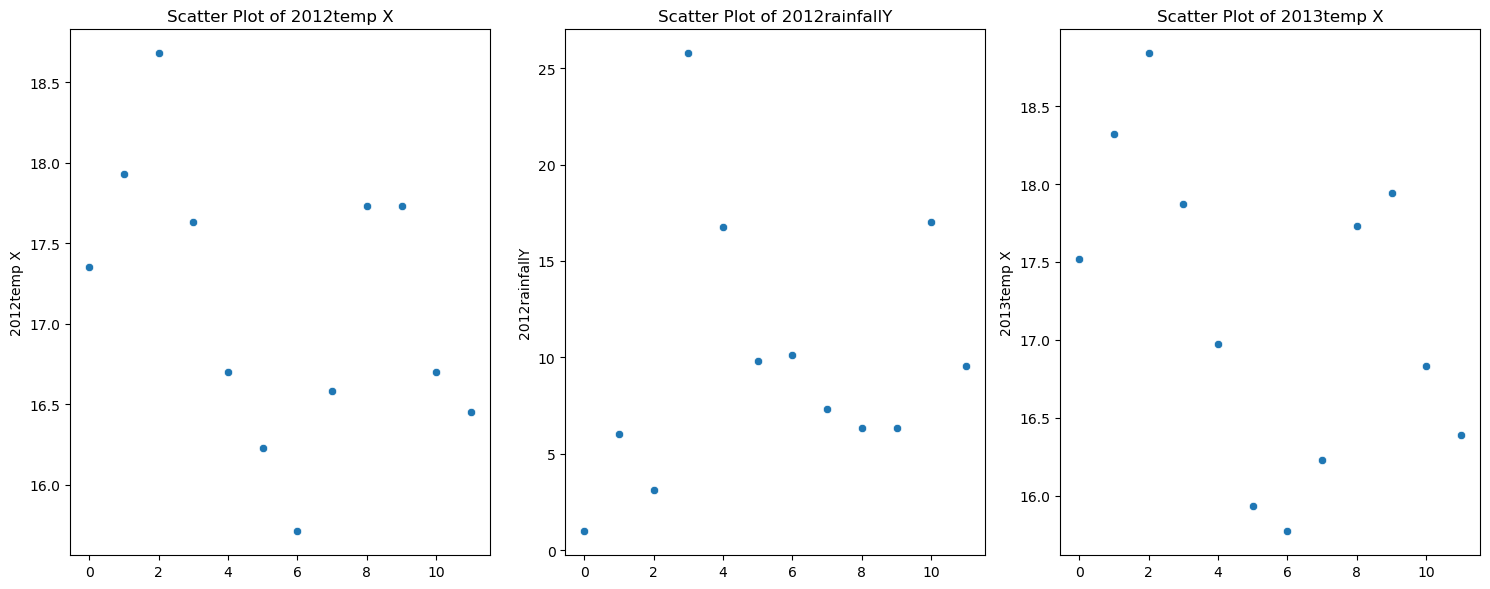


Outliers identified by Z-score method (threshold = 3):
(array([], dtype=int64), array([], dtype=int64))

Outliers identified by IQR method:
   2012temp X  2012rainfallY  2013temp X  2013rainfallY  2014temp X  \
2       18.68           3.11       18.84          13.77       18.55   
3       17.63          25.78       17.87          28.06       17.83   
9       17.73           6.34       17.94           8.82       17.87   

   2014rainfallY  2015temp X  2015rainfallY  2016temp X  2016rainfallY  \
2           6.73       18.52           5.05       20.10           3.07   
3           8.59       18.00           7.89       18.33          10.91   
9           9.07       18.97           2.52       18.23           4.49   

   2017temp X  2017rainfallY  2018temp X  2018rainfallY  2019temp X  \
2       19.39           1.51       18.00           8.02       20.32   
3       18.33           6.58       17.73          12.98       19.50   
9       18.55           8.86       18.16           6.62       17

In [19]:
# Load the data from the Excel file
df = pd.read_excel('temp-rainfall data.xlsx')

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Select key columns for detailed analysis (you can adjust this selection)
key_columns = numeric_df.columns[:3]  # Adjust the slice for the number of columns you want to visualize

# Visual Inspection for Outliers using Box Plots for key columns
plt.figure(figsize=(15, 6))
for i, column in enumerate(key_columns):
    plt.subplot(1, len(key_columns), i + 1)
    sns.boxplot(y=numeric_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Visual Inspection for Outliers using Scatter Plots for key columns
plt.figure(figsize=(15, 6))
for i, column in enumerate(key_columns):
    plt.subplot(1, len(key_columns), i + 1)
    sns.scatterplot(data=numeric_df, y=column, x=numeric_df.index)
    plt.title(f'Scatter Plot of {column}')
plt.tight_layout()
plt.show()

# Statistical Methods for Outliers
# Using Z-score to identify outliers for all numeric columns
threshold = 3
z_scores = np.abs(stats.zscore(numeric_df))
outliers_zscore = np.where(z_scores > threshold)
print("\nOutliers identified by Z-score method (threshold = 3):")
print(outliers_zscore)

# Using IQR to identify outliers for all numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers identified by IQR method:")
print(numeric_df[outliers_iqr])

# Summary of outliers
print("\nSummary of outliers by IQR method for key columns:")
for column in key_columns:
    column_outliers = numeric_df[column][outliers_iqr]
    print(f"{column}: {column_outliers.values}")
# Load the data from the Excel file
df = pd.read_excel('temp-rainfall data.xlsx')

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Select key columns for detailed analysis (you can adjust this selection)
key_columns = numeric_df.columns[:3]  # Adjust the slice for the number of columns you want to visualize

# Visual Inspection for Outliers using Box Plots for key columns
plt.figure(figsize=(15, 6))
for i, column in enumerate(key_columns):
    plt.subplot(1, len(key_columns), i + 1)
    sns.boxplot(y=numeric_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Visual Inspection for Outliers using Scatter Plots for key columns
plt.figure(figsize=(15, 6))
for i, column in enumerate(key_columns):
    plt.subplot(1, len(key_columns), i + 1)
    sns.scatterplot(data=numeric_df, y=column, x=numeric_df.index)
    plt.title(f'Scatter Plot of {column}')
plt.tight_layout()
plt.show()

# Statistical Methods for Outliers
# Using Z-score to identify outliers for all numeric columns
threshold = 3
z_scores = np.abs(stats.zscore(numeric_df))
outliers_zscore = np.where(z_scores > threshold)
print("\nOutliers identified by Z-score method (threshold = 3):")
print(outliers_zscore)

# Using IQR to identify outliers for all numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers identified by IQR method:")
print(numeric_df[outliers_iqr])

# Summary of outliers
print("\nSummary of outliers by IQR method for key columns:")
for column in key_columns:
    column_outliers = numeric_df[column][outliers_iqr]
    print(f"{column}: {column_outliers.values}")


## Descriptive Statistics

In [20]:
### Descriptive Sattistics

# Load the data from the Excel file
df = pd.read_excel('temp-rainfall data.xlsx')

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Compute descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


First few rows of the dataframe:
   Month  2012temp X  2012rainfallY  2013temp X  2013rainfallY  2014temp X  \
0    Jan       17.35           0.97       17.52           4.53       17.35   
1    Feb       17.93           6.01       18.32           3.81       18.29   
2  March       18.68           3.11       18.84          13.77       18.55   
3  April       17.63          25.78       17.87          28.06       17.83   
4    May       16.70          16.74       16.97           8.60       17.45   

   2014rainfallY  2015temp X  2015rainfallY  2016temp X  2016rainfallY  \
0           2.53       17.68           0.66       17.81           6.18   
1          10.58       18.54           1.84       18.62           2.89   
2           6.73       18.52           5.05       20.10           3.07   
3           8.59       18.00           7.89       18.33          10.91   
4           7.90       17.65           7.63       16.90           8.60   

   2017temp X  2017rainfallY  2018temp X  2018rainfal

### Forecast for the next one year

First few rows of the dataframe:
               value
date                
2020-01-01  1.764052
2020-01-02  2.164210
2020-01-03  3.142948
2020-01-04  5.383841
2020-01-05  7.251399

Descriptive Statistics:
             value
count  1097.000000
mean    -23.035281
std      26.382044
min     -66.590790
25%     -46.801616
50%     -20.940741
75%       2.649454
max      20.585036


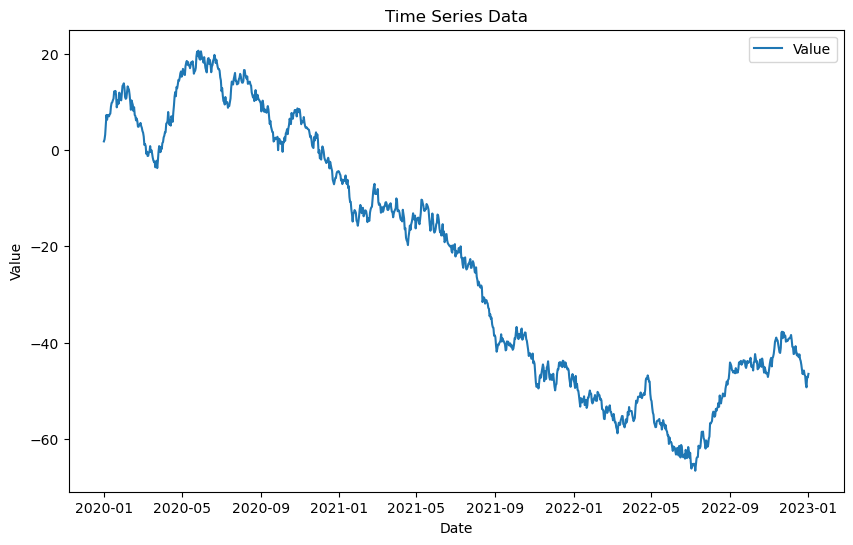

In [21]:
# Generate sample time series data
np.random.seed(0)
date_rng = pd.date_range(start='1/1/2020', end='1/1/2023', freq='D')
data = np.random.randn(len(date_rng)).cumsum()  # Cumulative sum to create a trend
df = pd.DataFrame(date_rng, columns=['date'])
df['value'] = data

# Set the date as the index
df.set_index('date', inplace=True)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Compute descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Value')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


## Checking for linearity and normality


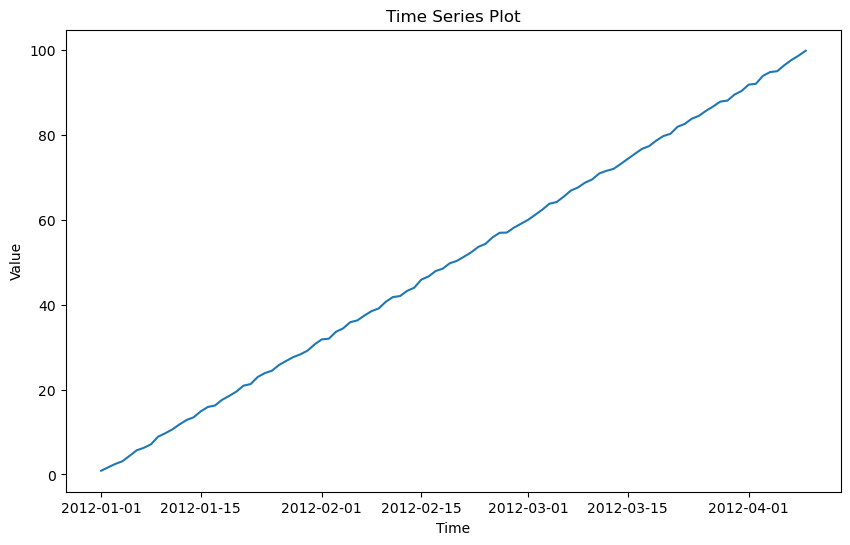

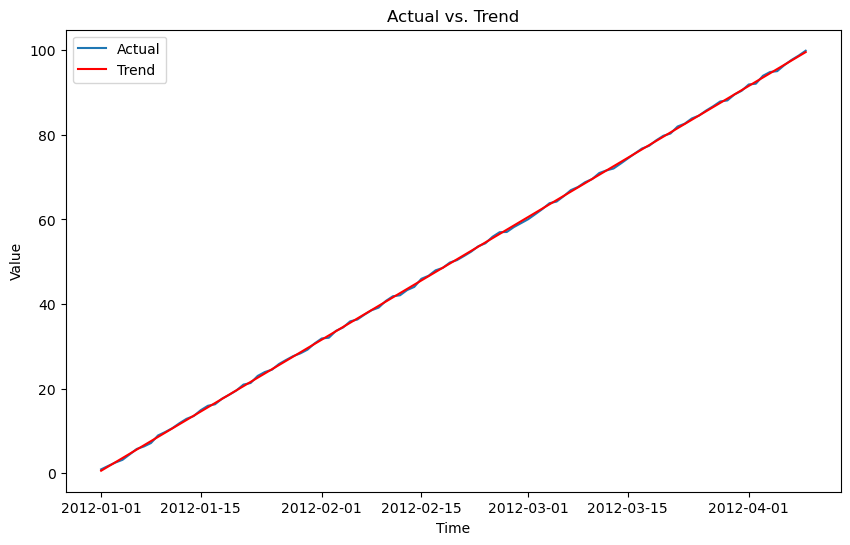

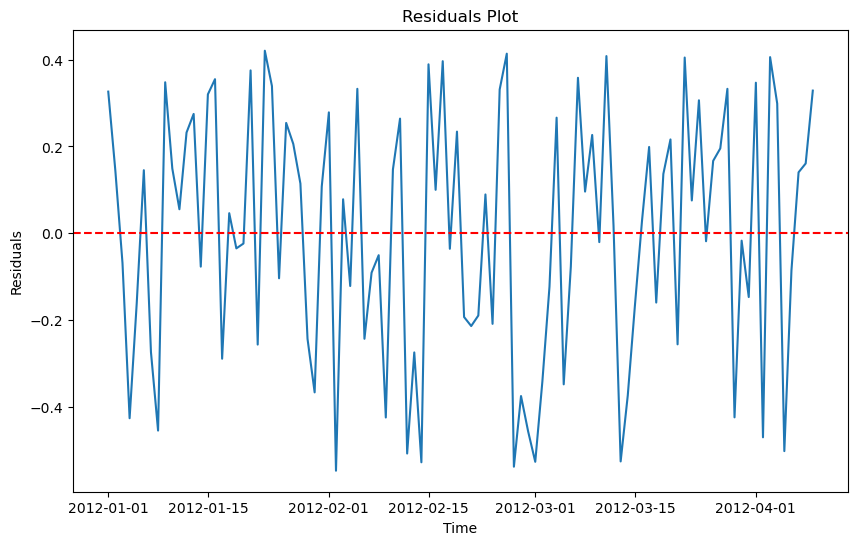

In [22]:
### Checking for Linearity


# Sample time series data
data = {'time': pd.date_range(start='1/1/2012', periods=100, freq='D'),
        'value': np.random.rand(100) + np.arange(100)}
df = pd.DataFrame(data)

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='value', data=df)
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Linear regression
X = np.arange(len(df)).reshape(-1, 1)
y = df['value']
model = LinearRegression()
model.fit(X, y)
df['trend'] = model.predict(X)

# Plotting actual vs. trend
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['value'], label='Actual')
plt.plot(df['time'], df['trend'], label='Trend', color='red')
plt.legend()
plt.title('Actual vs. Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Residuals plot
residuals = y - df['trend']
plt.figure(figsize=(10, 6))
plt.plot(df['time'], residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


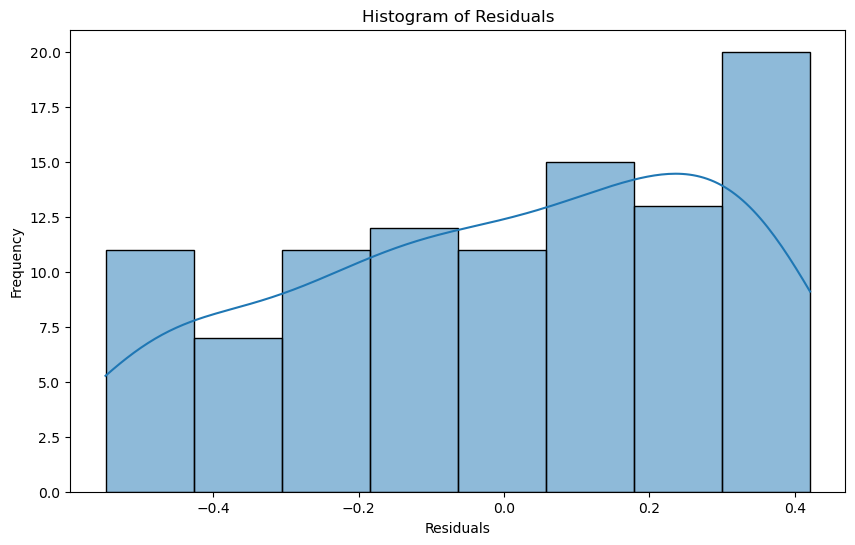

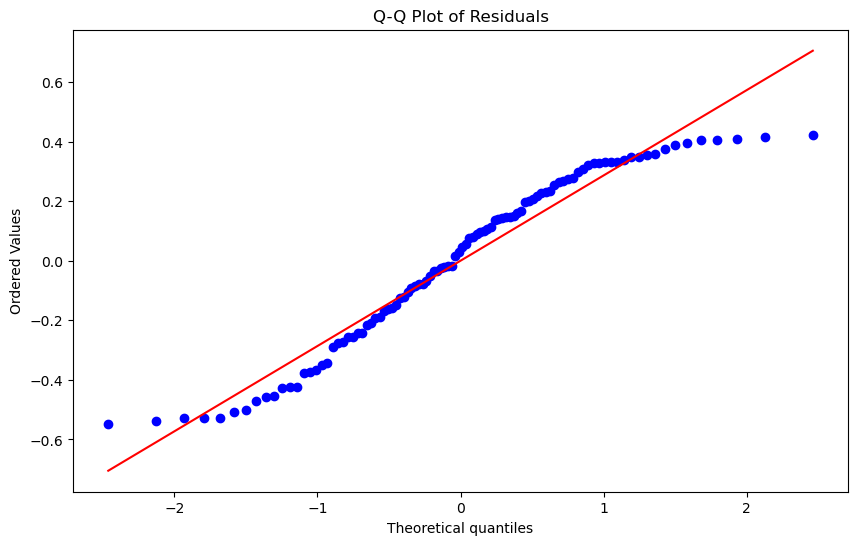

Shapiro-Wilk Test:
Statistic: 0.9421047568321228
p-value: 0.0002597036655060947

Anderson-Darling Test:
Statistic: 1.4714656184842028
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [23]:
### Checking for normality


# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test:')
print('Statistic:', shapiro_test.statistic)
print('p-value:', shapiro_test.pvalue)

# Anderson-Darling test
ad_test = stats.anderson(residuals, dist='norm')
print('\nAnderson-Darling Test:')
print('Statistic:', ad_test.statistic)
print('Critical Values:', ad_test.critical_values)
print('Significance Levels:', ad_test.significance_level)
